In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [4]:
data = pd.read_csv('./data/instagram_reach.csv')

In [5]:
data.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [6]:
data.shape

(100, 8)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [8]:
data.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

Since we have missing 6 missing values in caption, we can drop the missing values as we cannot impute the caption as it may vary according to the post or story in instagram.


In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

we can also drop the unnamed:0 column as it is of no use 


In [11]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [12]:
data.head()

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


In [48]:
data.tail()

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
95,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3,31
96,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3,42
97,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3,10
98,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3,222
99,25,palmariusdev,Obtén tu tienda en línea ahora.,741,#marketing #programming#development #desarroll...,3,109


Text(0.5, 1.0, 'Distribution of followers')

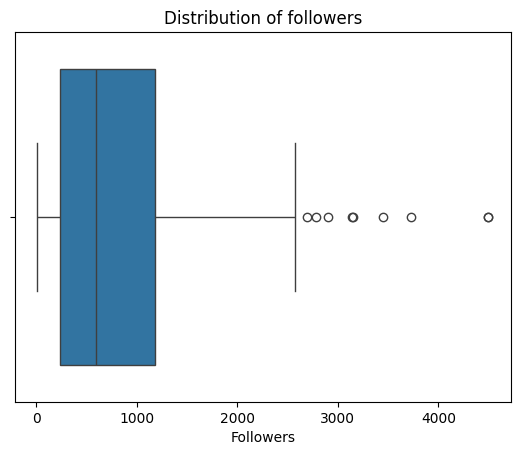

In [21]:
fig = sns.boxplot(data, x='Followers')
fig.set_title('Distribution of followers')

Insight : We can see that most of the users have under 1200 followers

Text(0.5, 1.0, 'Distribution of likes')

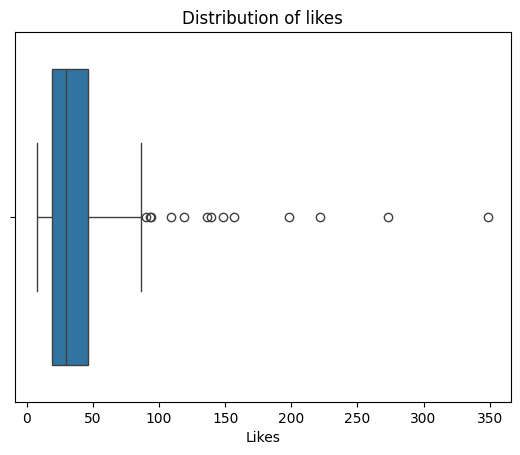

In [22]:
fig = sns.boxplot(data, x='Likes')
fig.set_title('Distribution of likes')

Insight : We can see that most of the posts has around 50 likes.

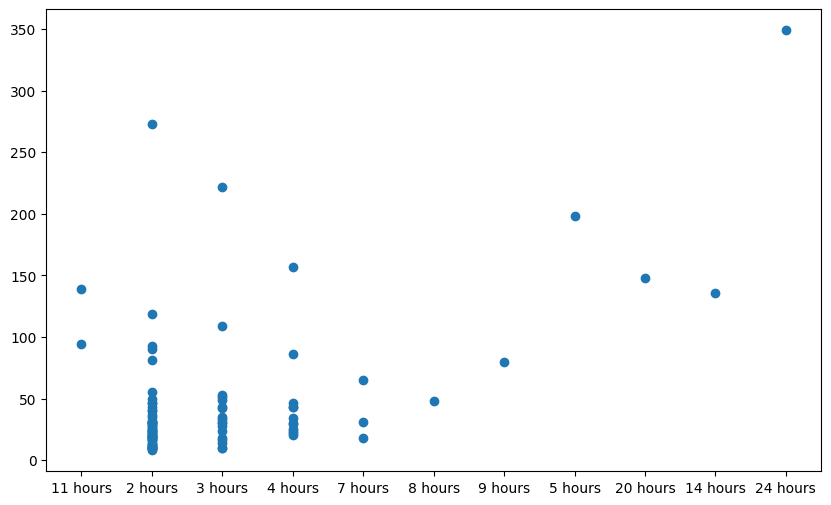

In [33]:
plt.figure(figsize=(10,6))
fig = plt.scatter(x='Time since posted', y='Likes',data=data)
# fig.set_title('Time since posted vs Likes')

Insight: There is a linear relationship between time since posted and Likes

<Axes: xlabel='Followers', ylabel='Likes'>

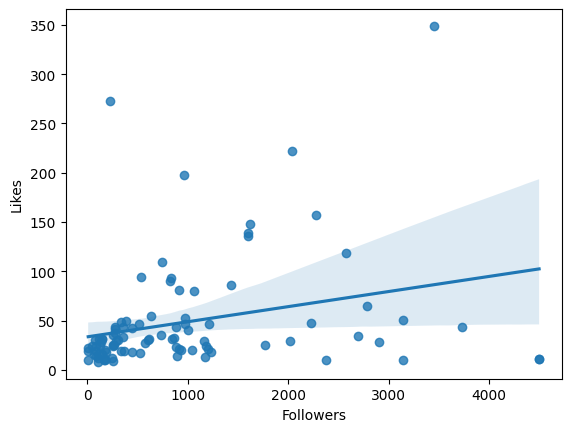

In [36]:
sns.regplot(data,x='Followers',y='Likes')

Insight: We can see that there is a relationship between Followers and likes.

In [39]:
data.columns

Index(['S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [41]:
data['Time since posted'] = data['Time since posted'].str.extract('(\d+)').astype(int)

In [43]:
data.head()

,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11,139
1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2,23
2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2,25
3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3,49
4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3,30


In [52]:
data['USERNAME']=le.fit_transform(data['USERNAME'])
data['Caption']=le.fit_transform(data['Caption'])
data['Hashtags']=le.fit_transform(data['Hashtags'])

In [53]:
X = data[['USERNAME', 'Caption', 'Followers', 'Hashtags']]
y = data[['Time since posted', 'Likes']]

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25)

In [58]:
X_train.head(2)

,USERNAME,Caption,Followers,Hashtags
23,61,10,4496,6
32,18,3,894,76


In [59]:
y_train.head(2)

,Time since posted,Likes
23,2,11
32,2,14


In [55]:
scaler=StandardScaler()

In [56]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [60]:
models={

    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'Randomforest':RandomForestRegressor()

}

def evaluate_model(true, predict):
    r2=r2_score(true, predict)
    mae=mean_absolute_error(true,predict)
    mse=mean_squared_error(true,predict)
    return r2, mae,mse,

for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    R2,MAE,MSE=evaluate_model(y_test,y_pred)

    print("Model : ",model)
    print("MSE: ", MSE)
    print("MAE: ",MAE)
    print("R2 SCORE: ",R2)

    print("="*40)
    print("\n")

Model :  LinearRegression()
MSE:  968.1477138107109
MAE:  17.644059415806037
R2 SCORE:  0.02582267684989792


Model :  Lasso()
MSE:  967.6701481269706
MAE:  17.61940648102036
R2 SCORE:  0.028753425865644


Model :  Ridge()
MSE:  968.1458059211363
MAE:  17.644006134707507
R2 SCORE:  0.025823424310056076


Model :  ElasticNet()
MSE:  967.8402321035618
MAE:  17.629581446669057
R2 SCORE:  0.02757005643027044


Model :  RandomForestRegressor()
MSE:  1335.24220625
MAE:  18.474791666666665
R2 SCORE:  -0.1325370602921211




In [63]:

# Create a parameter grid
param_grid = {'alpha': [0,1,2,3,4]}

# Use GridSearchCV to perform grid search with cross-validation
grid_search = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error',n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print(best_alpha)


4


Lasso(alpha=4)

In [65]:
lasso_best_model = Lasso(alpha=best_alpha)
lasso_best_model.fit(X_train, y_train)
y_pred_lasso = lasso_best_model.predict(X_test)
r2,mae,mse = evaluate_model(y_test,y_pred_lasso)
print('R2_score : ',r2)
print('MAE : ',mae)
print('MSE : ',mse)

R2_score :  0.030580278464177102
MAE :  17.57057317923605
MSE :  966.5503117075717
